In [1]:
import os

import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import tensorflow as tf

import tractoencoder_gsoc.utils as utils

2024-07-24 12:36:31.023343: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-24 12:36:31.087190: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-24 12:36:31.723438: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
%matplotlib inline

In [3]:
project_dir = os.path.dirname(os.getcwd())
# Load tractogram
tractograms = []
tractogram_streamline_lengths = []
mode = "train"

types = ["plausibles", "implausibles"]

for type in types:
    tractogram_fibercup = os.path.join(project_dir,
                                       f"data/fibercup/fibercup_advanced_filtering_no_ushapes/ae_input_std_endpoints/{mode}/fibercup_Simulated_prob_tracking_minL10_resampled256_{type}_std_endpoints_{mode}.trk")
    anat_fname = os.path.join(project_dir,
                              "data/fibercup/Simulated_FiberCup.nii.gz")
    os.path.exists(tractogram_fibercup)
    tractogram = utils.prepare_tensor_from_file(tractogram_fibercup, anat_fname)
    tractograms.append(tractogram)
    streamline_lengths = [utils.compute_streamline_length(streamline) for streamline in tractogram]
    tractogram_streamline_lengths.append(streamline_lengths)
    

# CONDITIONAL VAE

In [4]:
# Path to model
model_path = os.path.join(project_dir,
                          "data/trained_models/cond_vae_test_0",
                          "model_final.keras")
# Load model 
cond_VAE = tf.keras.models.load_model(model_path, compile=False)

## t-SNE projection of PLAUSIBLE and IMPLAUSIBLE fibers

In [5]:
# Assuming `encoder` is your encoder model and `data` is your dataset
latent_space_representations_cvae_pl_impl = []
for tractogram in tractograms:
    latent_space_representations_cvae_pl_impl.append(cond_VAE.encoder(tractogram)[0].numpy())  # First element is z_mean
# Concatenate latent space representations
latent_space_representations_cvae_pl_impl = np.concatenate(latent_space_representations_cvae_pl_impl, axis=0)

In [6]:
# Apply t-SNE to reduce dimensions to 2
tsne = TSNE(n_components=2, random_state=2208,
            perplexity=30,
            early_exaggeration=12)
tsne_results_cvae_pl_impl = tsne.fit_transform(latent_space_representations_cvae_pl_impl)

(-119.44505805969239,
 115.65285987854004,
 -110.48352966308593,
 115.20398864746093)

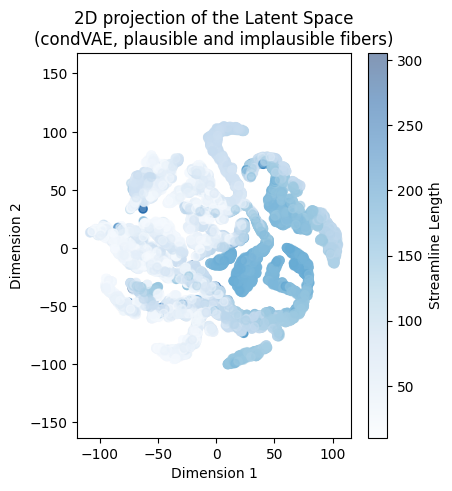

In [7]:
# Plot the results
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(131)
scatter_cvae_pl_impl = ax.scatter(tsne_results_cvae_pl_impl[:, 0], tsne_results_cvae_pl_impl[:, 1],
           c=tractogram_streamline_lengths[0] + tractogram_streamline_lengths[1],
           alpha=0.5, cmap="Blues")
ax.set_title('2D projection of the Latent Space\n(condVAE, plausible and implausible fibers)')
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
fig.colorbar(scatter_cvae_pl_impl, ax=ax, label='Streamline Length')
ax.axis('equal')

## t-SNE projection of PLAUSIBLE fibers

In [8]:
# Assuming `encoder` is your encoder model and `data` is your dataset
latent_space_representations_cvae_pl = []
for tractogram in tractograms:
    latent_space_representations_cvae_pl.append(cond_VAE.encoder(tractogram)[0].numpy())  # First element is z_mean
# Concatenate latent space representations
latent_space_representations_cvae_pl = np.array(latent_space_representations_cvae_pl[0])

In [9]:
# Apply t-SNE to reduce dimensions to 2
tsne = TSNE(n_components=2, random_state=2208,
            perplexity=30,
            early_exaggeration=12)
tsne_results_cvae_pl = tsne.fit_transform(latent_space_representations_cvae_pl)


(-68.52229824066163, 68.7471097946167, -72.551957321167, 80.00022239685059)

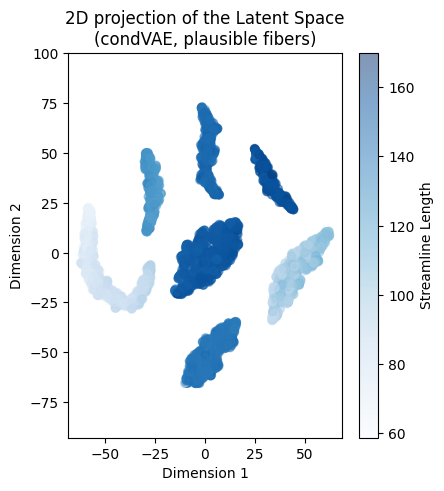

In [10]:
# Plot the results
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(131)
scatter_cvae_pl = ax.scatter(tsne_results_cvae_pl[:, 0], tsne_results_cvae_pl[:, 1],
           c=tractogram_streamline_lengths[0], alpha=0.5,
           cmap="Blues")
ax.set_title('2D projection of the Latent Space\n(condVAE, plausible fibers)')
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
fig.colorbar(scatter_cvae_pl, ax=ax, label="Streamline Length")
ax.axis('equal')

---
# VANILLA VAE

In [11]:
# VANILLA VAE
model_path = os.path.join(project_dir,
                          "data/trained_models/vae_plausible_implausible",
                          "model_final.keras")
# Load model
VAE = tf.keras.models.load_model(model_path, compile=False)

## t-SNE projection of PLAUSIBLE and IMPLAUSIBLE fibers

In [12]:
# Assuming `encoder` is your encoder model and `data` is your dataset
latent_space_representations_vae_pl_impl = []
for tractogram in tractograms:
    latent_space_representations_vae_pl_impl.append(VAE.encoder(tractogram)[0])  # First element is z_mean
# Concatenate latent space representations
latent_space_representations_vae_pl_impl = np.concatenate(latent_space_representations_vae_pl_impl, axis=0)

In [13]:
# Apply t-SNE to reduce dimensions to 2
tsne = TSNE(n_components=2, random_state=2208,
            perplexity=30,
            early_exaggeration=12)
tsne_results_vae_pl_impl = tsne.fit_transform(latent_space_representations_vae_pl_impl)

(-102.0701919555664,
 116.0395523071289,
 -110.72545890808105,
 101.93298606872558)

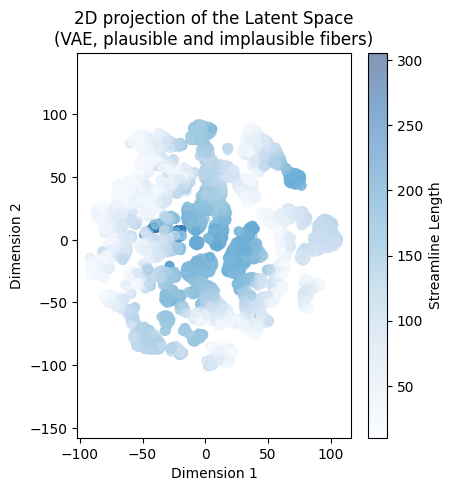

In [14]:
# Plot the results
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(131)
scatter_vae_pl_impl = ax.scatter(tsne_results_vae_pl_impl[:, 0], tsne_results_vae_pl_impl[:, 1],
           c=tractogram_streamline_lengths[0] + tractogram_streamline_lengths[1],
           alpha=0.5, cmap="Blues")
ax.set_title('2D projection of the Latent Space\n(VAE, plausible and implausible fibers)')
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
fig.colorbar(scatter_vae_pl_impl, ax=ax, label="Streamline Length")
ax.axis('equal')

## t-SNE projection of PLAUSIBLE and IMPLAUSIBLE fibers

In [15]:
# Assuming `encoder` is your encoder model and `data` is your dataset
latent_space_representations_vae_pl = []
for tractogram in tractograms:
    latent_space_representations_vae_pl.append(VAE.encoder(tractogram)[0])  # First element is z_mean
# Concatenate latent space representations
latent_space_representations_vae_pl = np.array(latent_space_representations_vae_pl[0])

In [16]:
# Apply t-SNE to reduce dimensions to 2
tsne = TSNE(n_components=2, random_state=2208,
            perplexity=30,
            early_exaggeration=12)
tsne_results_vae_pl = tsne.fit_transform(latent_space_representations_vae_pl)

(-57.900959968566895, 70.33593845367432, -55.38744964599609, 67.60326232910157)

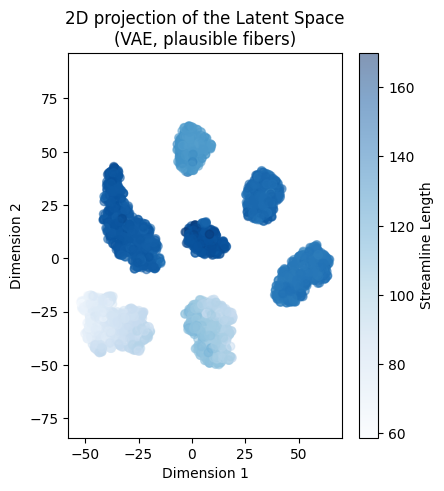

In [17]:
# Plot the results
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(131)
scatter_vae_pl = ax.scatter(tsne_results_vae_pl[:, 0], tsne_results_vae_pl[:, 1], alpha=0.5,
                            cmap="Blues", c=tractogram_streamline_lengths[0])
ax.set_title('2D projection of the Latent Space\n(VAE, plausible fibers)')
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
fig.colorbar(scatter_vae_pl, ax=ax, label="Streamline Length")
ax.axis('equal')